## <font color='crimson'>Table of Contents</font>
<ul>
<li><a href="#kmean">1) Kmeans Clustering</a></li>
<li><a href="#ann">2) Neural Network Classification</a></li>
<li><a href="#tree">3) Decision Tree Classification</a></li>
</ul>

### <font color='teal'>Introduction and EDA</font>

In [1]:
# import libraries and data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans

df = pd.read_csv('wine.csv')

In [2]:
# see data set
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# any missing values?
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [4]:
# any duplicates?
df.duplicated().sum()

0

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
# data stat
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# see alcohol indicators by type of Wine
df.groupby('Wine').Alcohol.mean()

Wine
1    13.744746
2    12.278732
3    13.153750
Name: Alcohol, dtype: float64

In [8]:
# see alchohol scoring by type of wine
df.groupby('Wine').Acl.mean()

Wine
1    17.037288
2    20.238028
3    21.416667
Name: Acl, dtype: float64

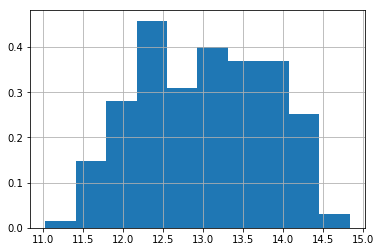

In [9]:
# alchohol frequency distribution
df.Alcohol.hist(density=True);

In [10]:
# correlation matrix
df.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


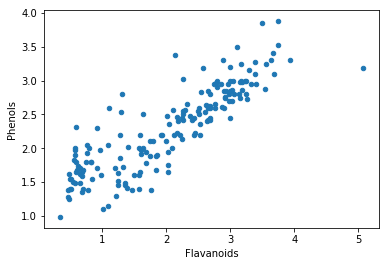

In [11]:
# relationship between Flavanoids and Phenols (positive)
df.plot.scatter(x="Flavanoids", y="Phenols");

<a id='kmean'></a>
## <font color='teal'>1) Kmeans Clustering</font>

In [12]:
# slide dataframe to x=explanatory var, y=dependent var
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [13]:
x.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [14]:
y.columns

Index(['Wine'], dtype='object')

In [15]:
# K Means Cluster Model
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
model.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [17]:
# convert all the 0 to 3
predY = np.choose(model.labels_, [3, 1, 2]).astype(np.int64)

In [18]:
pd.value_counts(y['Wine'])

2    71
1    59
3    48
Name: Wine, dtype: int64

In [19]:
pd.value_counts(model.labels_)

2    69
0    62
1    47
dtype: int64

In [20]:
pd.value_counts(predY)

2    69
3    62
1    47
dtype: int64

In [21]:
# Performance Metrics
sm.accuracy_score(y, predY)

0.702247191011236

In [22]:
# Confusion Matrix
sm.confusion_matrix(y, predY)

array([[46,  0, 13],
       [ 1, 50, 20],
       [ 0, 19, 29]], dtype=int64)

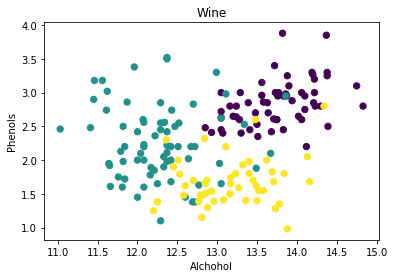

In [23]:
# Plot clustering
plt.scatter(x.Alcohol, x.Phenols, c=y.Wine, s=40)
plt.xlabel('Alchohol')
plt.ylabel('Phenols')
plt.title('Wine');

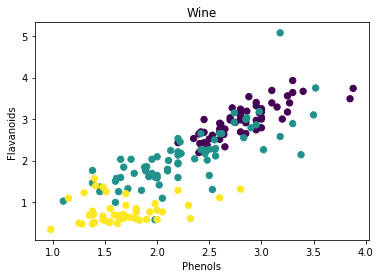

In [24]:
# Plot clustering
plt.scatter(x.Phenols, x.Flavanoids, c=y.Wine, s=40)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Wine');

<a id='ann'></a>
## <font color='teal'>2) Neural Network Classification</font>

In [25]:
# for Neural Network Classification
X = df.drop('Wine',axis=1)
y = df['Wine']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

C:\Users\Yongsvw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Yongsvw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Yongsvw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
# predict and prediction report
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[14  1  0]
 [ 1 14  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.93      0.88      0.90        16
           3       0.93      1.00      0.97        14

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



In [31]:
len(mlp.coefs_), len(mlp.coefs_[0]), len(mlp.intercepts_[0])

(4, 13, 13)

<a id='tree'></a>
## <font color='teal'>3) Decison Tree Classification</font>

In [32]:
# for Decision Tree
# for Neural Network Classification
X = df.drop('Wine',axis=1)
y = df['Wine']

In [33]:
# same as ANN above
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
# import DecisionTreeClassifier and model gini ratio
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [35]:
feature_2 = ["Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
target = ['1','2','3']

In [36]:
# predict y from X_test
predY = clf_gini.predict(X_test)
predY

array([3, 3, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 3, 2,
       2, 3, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 2,
       2], dtype=int64)

In [37]:
# accuracy rate 
print('Accuracy of Decision Tree (training set): ', round(clf_gini.score(X_train, y_train)*100,2), 'percent')
print('Accuracy of Decision Tree (test set):', round(clf_gini.score(X_test, y_test)*100),2, 'percent')

Accuracy of Decision Tree (training set):  90.98 percent
Accuracy of Decision Tree (test set): 84.0 2 percent


In [39]:
# classification report
print(classification_report(y_test,predY))
print(confusion_matrix(y_test,predY))

              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.84      0.84      0.84        19
           3       0.90      0.75      0.82        12

   micro avg       0.84      0.84      0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

[[13  0  1]
 [ 3 16  0]
 [ 0  3  9]]
